### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [4]:
# Rows and columns in the data
data.shape

(12684, 26)

In [5]:
# Count votes for Y vs N
data.value_counts('Y')


,count
Y,
1,7210
0,5474


2. Investigate the dataset for missing or problematic data.

In [6]:
# Check how many null values and incorrect values are present in the data set with isnull() and value_count() methods.
# car : 12576, Bar : 107, CoffeeHouse : 217, CarryAway : 151, RestaurantLessThan20 : 130, Restaurant20To50 : 189,
data.isnull().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


3. Decide what to do about your missing data -- drop, replace, other...

In [7]:
# Car column has 12576 null values out of 12684 samples. That is 99%. The type of car does not quite matter in our analysys about coupons.
#So we can drop the column. Assigning the result to data_cleaned
data_cleaned = data.drop('car',axis=1)
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

4. What proportion of the total observations chose to accept the coupon?



Text(0.5, 1.0, 'Percentage distribution of people accepted the coupon')

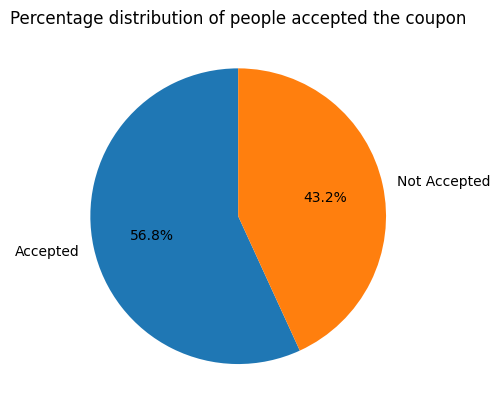

In [8]:
# Y vs N plot
plt.pie(data['Y'].value_counts(), labels=['Accepted','Not Accepted'], autopct='%1.1f%%', startangle=90)
plt.title('Percentage distribution of people accepted the coupon')

5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Coupon Acceptance Plot')

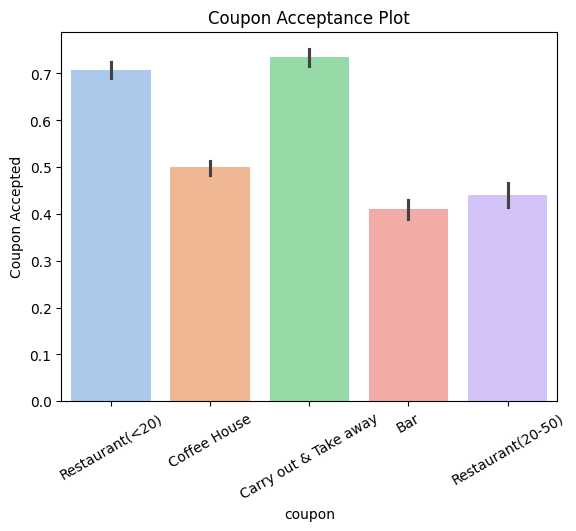

In [9]:
sns.barplot(x=data_cleaned['coupon'], y=data_cleaned['Y'], data=data_cleaned, palette='pastel', hue=data_cleaned['coupon'], legend=False)
plt.xticks(rotation=30)
plt.ylabel('Coupon Accepted')
plt.title('Coupon Acceptance Plot')
# Restaurant(<20) and Carry out & Take away coupons have more acceptance rate.

6. Use a histogram to visualize the temperature column.

,count
temperature,
80,6528
55,3840
30,2316


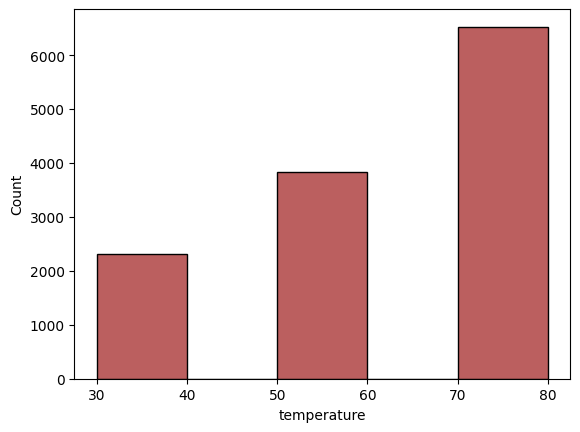

In [10]:
sns.histplot(data_cleaned['temperature'], bins=5, color='brown')
data_cleaned['temperature'].value_counts()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [11]:
data_bar = data_cleaned[data_cleaned['coupon']=='Bar']
data_bar

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


41.00148735746158

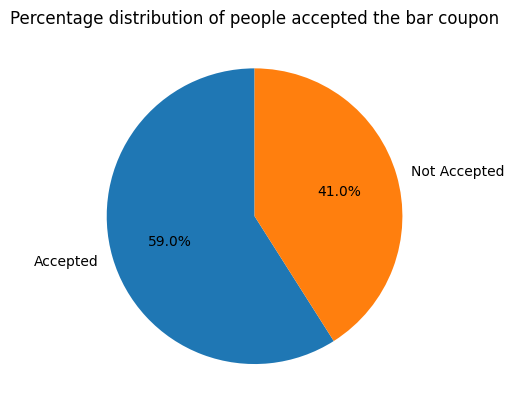

In [12]:
data_bar_y_percent = (data_bar['Y'].sum()/data_bar.shape[0])*100
plt.pie(data_bar['Y'].value_counts(), labels=['Accepted','Not Accepted'], autopct='%1.1f%%', startangle=90)
plt.title('Percentage distribution of people accepted the bar coupon')
data_bar_y_percent

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [13]:
data_bar['Bar'].value_counts()

,count
Bar,
never,830
less1,570
1~3,397
4~8,150
gt8,49


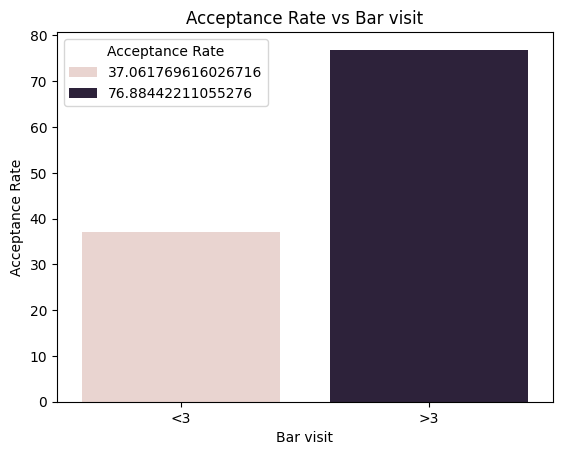

In [14]:
# Make a copy of data_bar
data_bar_copy = data_bar.copy()
# Add a new column to data_bar_copy 'BarFrequency' which will set less than 3 '<3' or greater than 3 '>3' based on the 'Bar' value
data_bar_copy['BarFrequency'] = data_bar_copy['Bar'].apply(lambda x : '>3' if ((x == '4~8') | (x == 'gt8'))
                                                                            else '<3' if  ((x == 'never') | (x == 'less1') | (x == '1~3'))
                                                                            else None)
# Group rows with new 'BarFrequency' and find the mean of 'Y' which will give the average of 'Y' values with 1
data_bar_acceptance_rate = (data_bar_copy.groupby(['BarFrequency'])['Y'].mean()*100).reset_index()
sns.barplot(data_bar_acceptance_rate , x= 'BarFrequency', y = 'Y', hue='Y')
plt.xlabel('Bar visit')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate vs Bar visit')
plt.legend(title="Acceptance Rate")


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


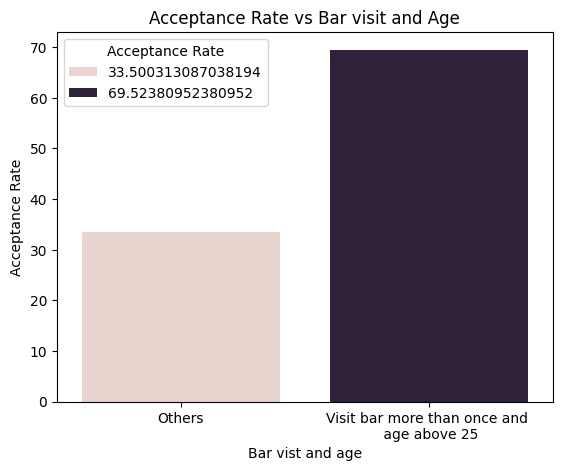

In [15]:
# Make a copy of data_bar
data_bar_copy = data_bar.copy()
#Clean the data. Map string to int
data_bar_copy['age'] = data_bar_copy['age'].replace({'below21': '20', '50plus': '50'})  # Replace specific cases
data_bar_copy['age'] = data_bar_copy['age'].str.extract('(\d+)').astype(int)

# Filter data based on conditions
# Driver goes to bar more than once
# Driver is over the age of 25
data_bar_copy['FreqAndGt25'] = data_bar_copy.apply(lambda row : 'Visit bar more than once and \n age above 25' if (((row['Bar'] == '1~3') | (row['Bar'] == '4~8') | (row['Bar'] == 'gt8'))  & (row['age']>25) )
                                                                else 'Others', axis=1)
#Plot the acceptence rate
data_bar_age_freq_acceptance_rate = (data_bar_copy.groupby(['FreqAndGt25'])['Y'].mean()*100).reset_index()
sns.barplot(data_bar_age_freq_acceptance_rate , x= 'FreqAndGt25', y = 'Y', hue='Y')
plt.xlabel('Bar vist and age')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate vs Bar visit and Age')
plt.legend(title="Acceptance Rate")


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


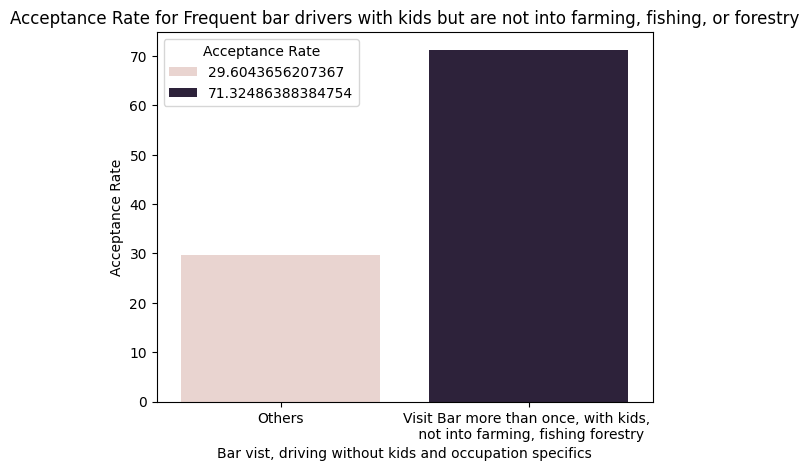

In [16]:
# Make a copy of data_bar
data_bar_copy = data_bar.copy()

#Clean Age data
#Clean the data. Map string to int
data_bar_copy['age'] = data_bar_copy['age'].replace({'below21': '20', '50plus': '50'})  # Replace specific cases
data_bar_copy['age'] = data_bar_copy['age'].str.extract('(\d+)').astype(int)

# Filter data based on conditions
# Drivers going to bar more than once
# Passengers that were not a kid
# Occupation other than farming, fishing, or forestry.
data_bar_copy['new_column'] = data_bar_copy.apply(lambda row : 'Visit Bar more than once, with kids, \n not into farming, fishing forestry' if( ((row['Bar'] == '1~3') | (row['Bar'] == '4~8') | (row['Bar'] == 'gt8')) & (row['passanger'] != 'Kid(s)') & (row['occupation'] != 'Farming Fishing & Forestry'))
                                                     else 'Others', axis=1)
#Plot the acceptence rate
data_bar_filtered_acceptance_rate = (data_bar_copy.groupby(['new_column'])['Y'].mean()*100).reset_index()
sns.barplot(data_bar_filtered_acceptance_rate , x= 'new_column', y = 'Y', hue='Y')
plt.xlabel('Bar vist, driving without kids and occupation specifics')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate for Frequent bar drivers with kids but are not into farming, fishing, or forestry')
plt.legend(title="Acceptance Rate")

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



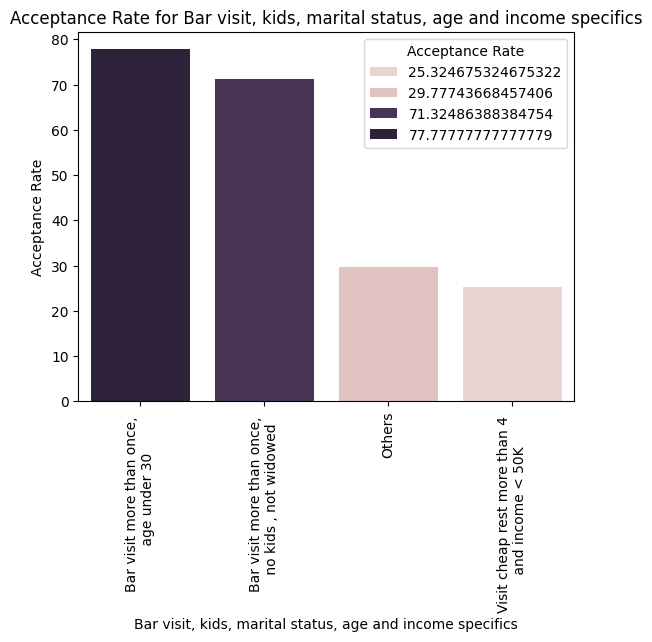

In [17]:
# Make a copy of data_bar
data_bar_copy = data_bar.copy()

#Clean Age data
#Clean the data. Map string to int
data_bar_copy['age'] = data_bar_copy['age'].replace({'below21': '20', '50plus': '50'})  # Replace specific cases
data_bar_copy['age'] = data_bar_copy['age'].str.extract('(\d+)').astype(int)

data_bar_copy['income'].unique()
# Filter data based on conditions
# Drivers going to bar more than once and Passengers that were not a kid and were not Widowed OR
# Drivers going to bar more than once and are under age of 30 OR
# Got to cheap restaurants more than 4 time and has income less than 50K
data_bar_copy['new_column'] = data_bar_copy.apply(lambda row : 'Bar visit more than once, \n no kids , not widowed' if   (((row['Bar'] == '1~3') | (row['Bar'] == '4~8') | (row['Bar'] == 'gt8')) & (row['passanger'] != 'Kid(s)') & (row['maritalStatus'] != 'Widowed'))
                                                               else 'Bar visit more than once, \n age under 30' if ( ((row['Bar'] == '1~3') | (row['Bar'] == '4~8') | (row['Bar'] == 'gt8')) & (row['age'] <30))
                                                               else 'Visit cheap rest more than 4 \n and income < 50K' if ( ((row['RestaurantLessThan20'] == '4~8') | (row['RestaurantLessThan20'] == 'gt8')) & ((row['income']  == '37500 - $49999')
                                                                                 | (row['income']  == '$12500 - $24999') | (row['income']  == '$25000 - $37499') | (row['income']  == 'Less than $12500')) )
                                                               else  'Others', axis=1)
#Plot the acceptence rate
data_bar_filtered_acceptance_rate = (data_bar_copy.groupby(['new_column'])['Y'].mean()*100).reset_index()
sns.barplot(data_bar_filtered_acceptance_rate , x= 'new_column', y = 'Y', hue='Y')
plt.xlabel('Bar visit, kids, marital status, age and income specifics')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=90)
plt.title('Acceptance Rate for Bar visit, kids, marital status, age and income specifics')
plt.legend(title="Acceptance Rate")

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

From the analysis its seen that :

*   Drivers who have visited bar 3 or more times have higer acceptence rate for the bar coupon.
*   Drivers who are above the age of 25 and who visit the bar more than once have higer acceptence rate for the bar coupon
*   Drivers who visit the bar more than once and are driving without kids and are not into farming fishing and forestry also have higer acceptence rate for the bar coupon
*   Drivers who visit the bar more than once and are under 30 years have higer acceptence rate for the bar coupon


--- In general could say that drivers who have visited bar atleast once and are between age 25 - 30 and travelling without kids have higher possibility of accepting bar coupon.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

1. Create a new DataFrame that contains just the Coffee coupons.

In [18]:
data_coffee = data_cleaned[data_cleaned['coupon']=='Coffee House']
data_coffee


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,0
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of Coffee House coupons were accepted?

Text(0.5, 1.0, 'Percentage distribution of people accepted the coffee coupon')

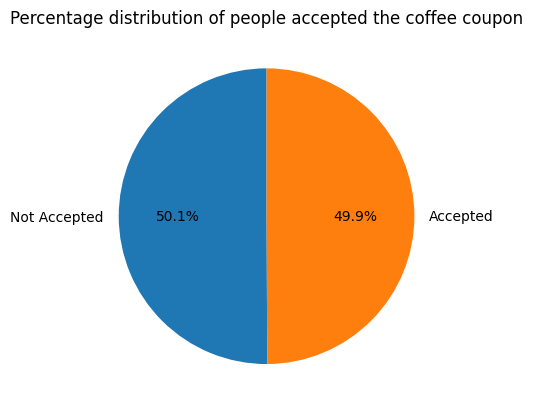

In [19]:
plt.pie(data_coffee['Y'].value_counts(), labels=['Not Accepted','Accepted'], autopct='%1.1f%%', startangle=90)
plt.title('Percentage distribution of people accepted the coffee coupon')


3. Check the relation between different columns with 'Y'

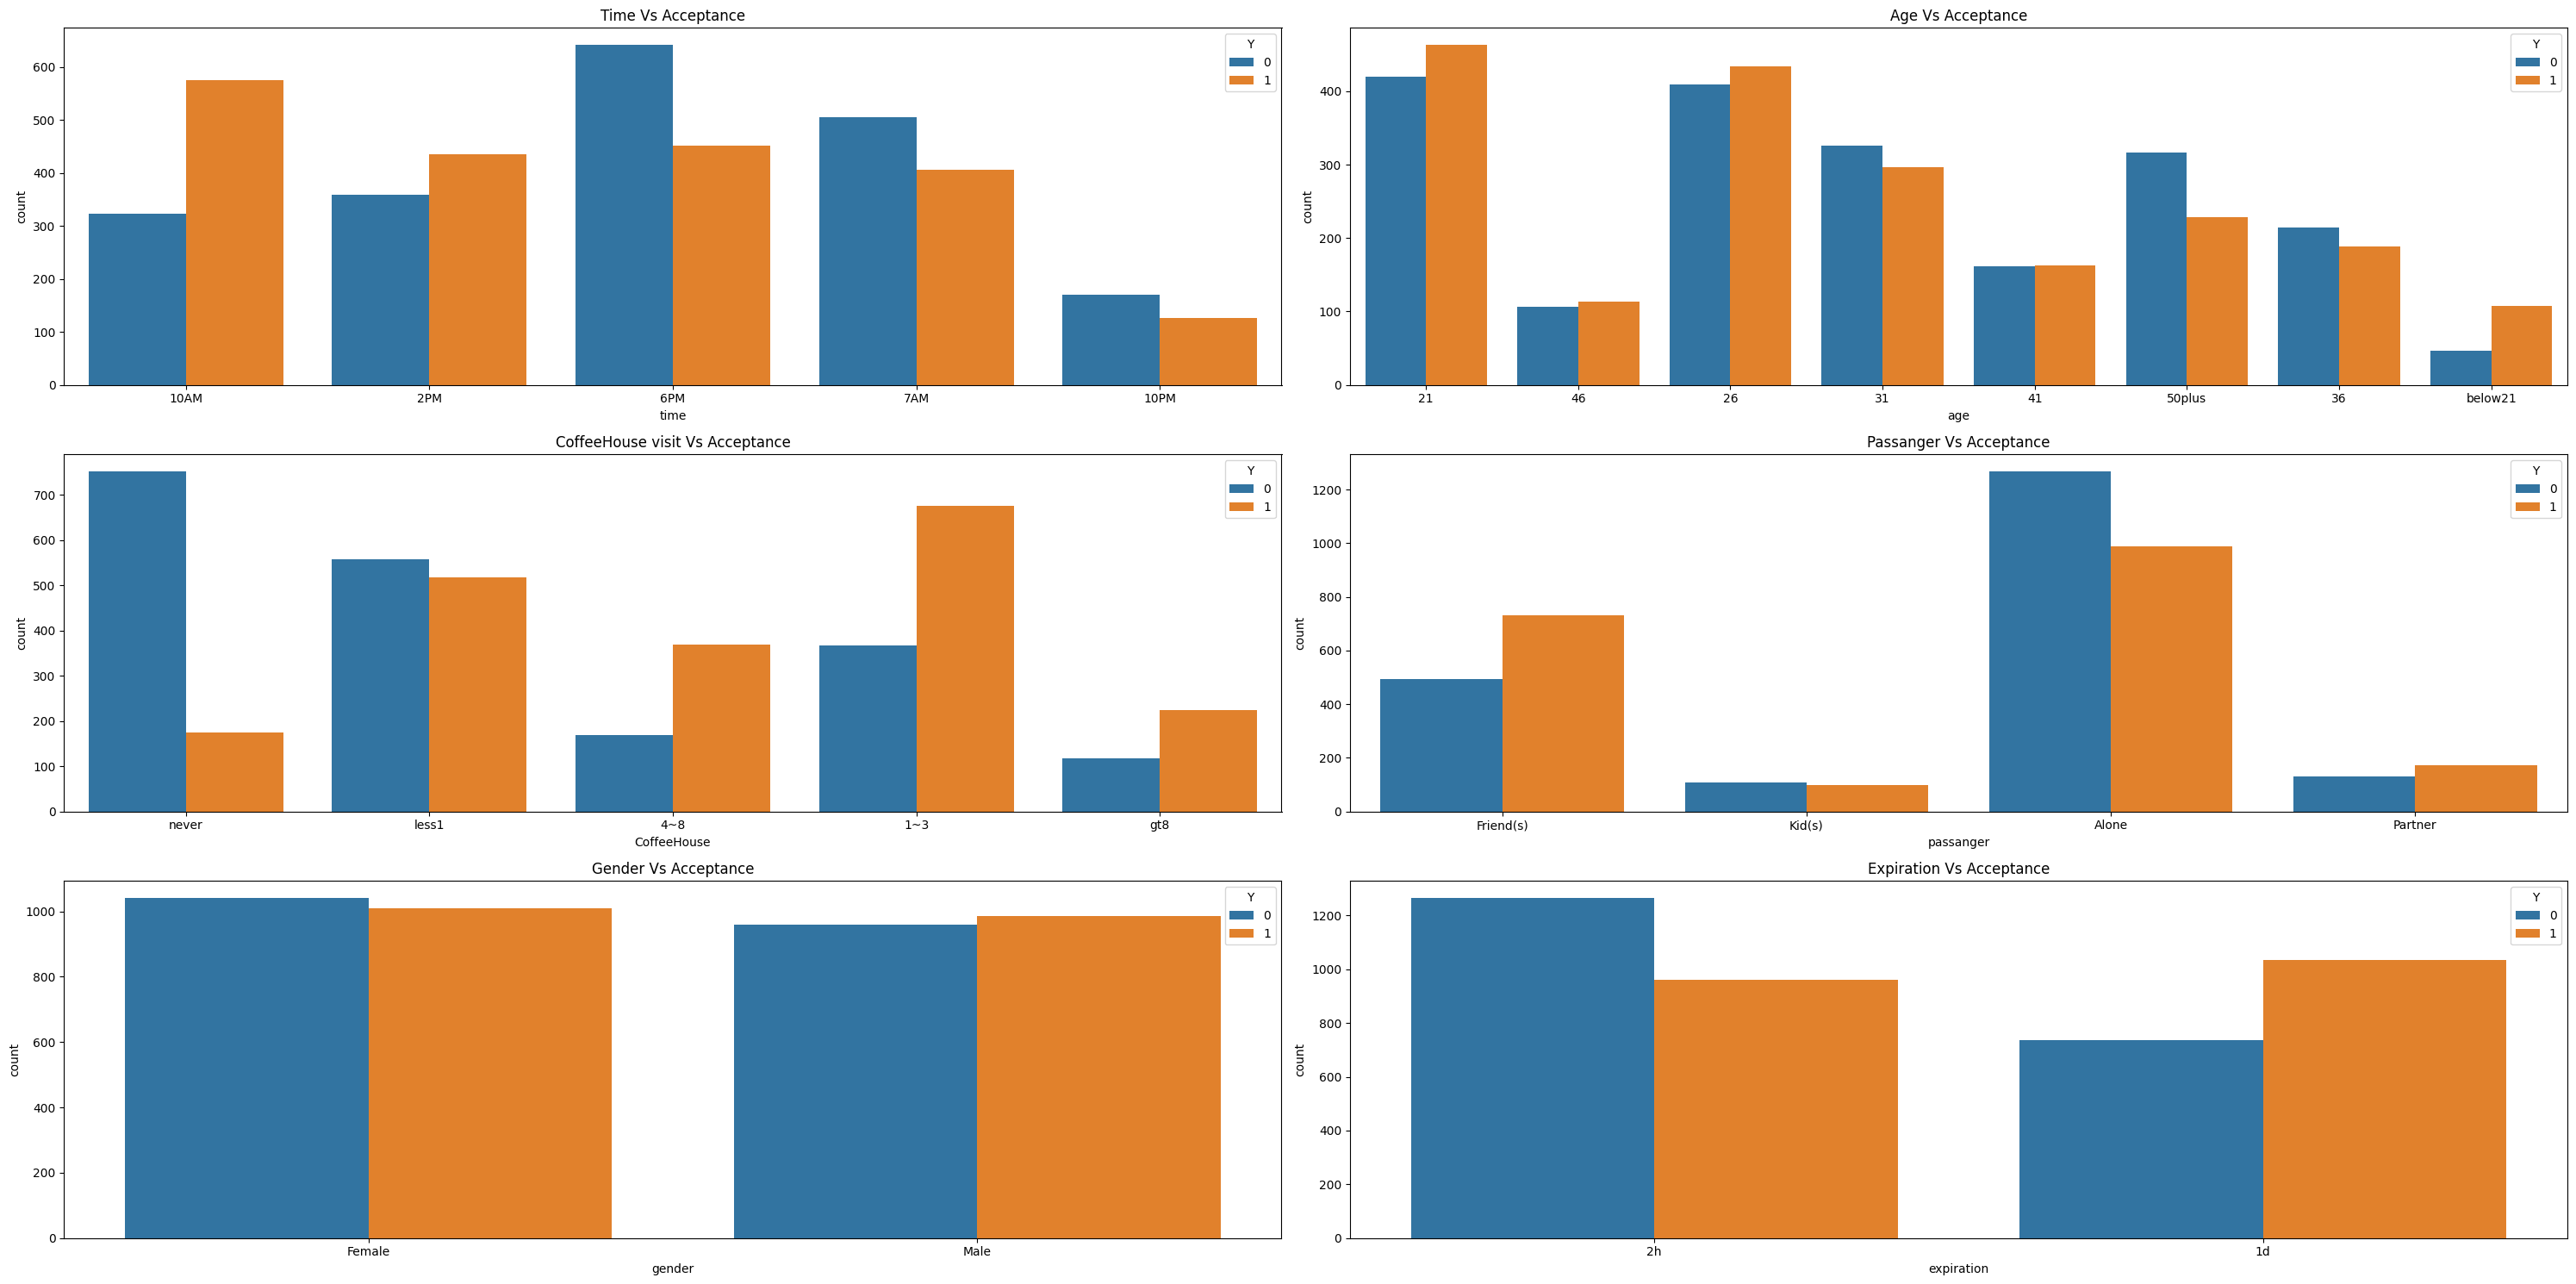

In [20]:
#Try with different columns and check acceptance

plt.figure(figsize=(30,15))
plt.subplot(321)
plt.title('Time Vs Acceptance')
sns.countplot(data=data_coffee,x=data_coffee['time'],hue=data_coffee['Y'])

plt.subplot(322)
plt.title('Age Vs Acceptance')
sns.countplot(data=data_coffee,x=data_coffee['age'],hue=data_coffee['Y'])

plt.subplot(323)
plt.title('CoffeeHouse visit Vs Acceptance')
sns.countplot(data=data_coffee,x=data_coffee['CoffeeHouse'],hue=data_coffee['Y'])

plt.subplot(324)
plt.title('Passanger Vs Acceptance')
sns.countplot(data=data_coffee,x=data_coffee['passanger'],hue=data_coffee['Y'])

plt.subplot(325)
plt.title('Gender Vs Acceptance')
sns.countplot(data=data_coffee,x=data_coffee['gender'],hue=data_coffee['Y'])

plt.subplot(326)
plt.title('Expiration Vs Acceptance')
sns.countplot(data=data_coffee,x=data_coffee['expiration'],hue=data_coffee['Y'])

plt.tight_layout()
plt.show()

# Inference :
# Drivers who have been to coffee house more than once have higher acceptance rate
# Drivers driving at 10 AM tends to have more acceptance rate
# Coupons with expiration 1d has more acceptence rate
# Drivers below age 21 has more acceptance rate
# Drivers with Occupation Healthcare Practitioners & Technical , Healthcare Support , Student has more acceptance rate
# Drivers with friends have more acceptance rate
# Gender has no impact on the coffee coupon acceptance


In [21]:
data_coffee.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3996 entries, 1 to 12681
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3996 non-null   object
 1   passanger             3996 non-null   object
 2   weather               3996 non-null   object
 3   temperature           3996 non-null   int64 
 4   time                  3996 non-null   object
 5   coupon                3996 non-null   object
 6   expiration            3996 non-null   object
 7   gender                3996 non-null   object
 8   age                   3996 non-null   object
 9   maritalStatus         3996 non-null   object
 10  has_children          3996 non-null   int64 
 11  education             3996 non-null   object
 12  occupation            3996 non-null   object
 13  income                3996 non-null   object
 14  Bar                   3959 non-null   object
 15  CoffeeHouse           3924 non-null   obje

4. Compare the acceptance rate between those who went to a coffee house more than once with others

In [22]:
data_coffee['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

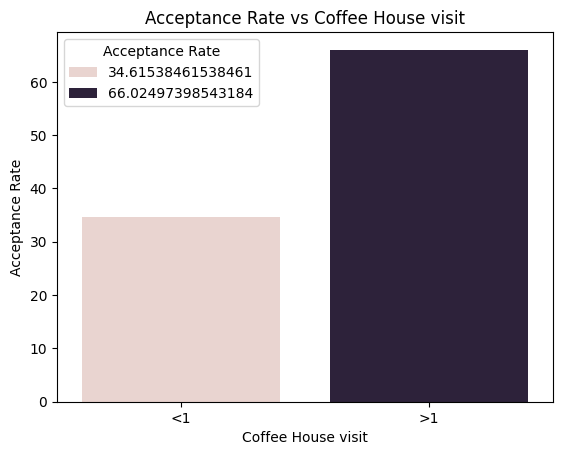

In [23]:
# Make a copy of data_coffee
data_coffee_copy = data_coffee.copy()
# Add a new column to data_coffee_copy 'CoffeeFrequencyAge'
data_coffee_copy['CoffeeFrequency'] = data_coffee_copy['CoffeeHouse'].apply(lambda x : '>1' if ( (x == '4~8') | (x == '1~3') | (x == 'gt8'))
                                                                            else '<1' if  ((x == 'less1') | (x == 'never'))
                                                                            else None)
# Group rows with new 'CoffeeFrequency' and find the mean of 'Y' which will give the average of 'Y' values with 1
data_coffee_acceptance_rate = (data_coffee_copy.groupby(['CoffeeFrequency'])['Y'].mean()*100).reset_index()
sns.barplot(data_coffee_acceptance_rate , x= 'CoffeeFrequency', y = 'Y', hue='Y')
plt.xlabel('Coffee House visit')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate vs Coffee House visit')
plt.legend(title="Acceptance Rate")

5. Compare the acceptance rate between those who went to a coffee house more than once and driving at 10:00 AM vs others

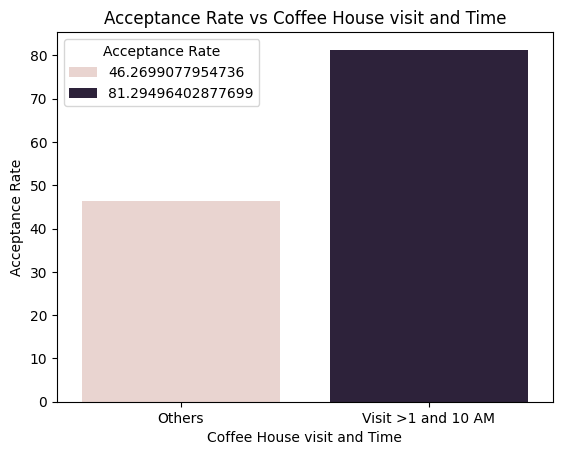

In [24]:
# Make a copy of data_coffee
data_coffee_copy = data_coffee.copy()
# Add a new column to data_coffee_copy 'CoffeeFrequencyAge'
data_coffee_copy['CoffeeFrequencyTime'] = data_coffee_copy.apply(lambda row : 'Visit >1 and 10 AM' if( ((row['CoffeeHouse'] == '4~8') | (row['CoffeeHouse'] == '1~3') | (row['CoffeeHouse'] == 'gt8'))  & (row['time'] == '10AM'))
                                                     else 'Others', axis=1)
# Group rows with new 'CoffeeFrequency' and find the mean of 'Y' which will give the average of 'Y' values with 1
data_coffee_acceptance_rate = (data_coffee_copy.groupby(['CoffeeFrequencyTime'])['Y'].mean()*100).reset_index()
sns.barplot(data_coffee_acceptance_rate , x= 'CoffeeFrequencyTime', y = 'Y', hue='Y')
plt.xlabel('Coffee House visit and Time')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate vs Coffee House visit and Time')
plt.legend(title="Acceptance Rate")



6. Compare the acceptance rate between those who went to a coffee house more than once and driving at 10:00 AM and Occupation in Healthcare Practitioners & Technical , Healthcare Support , Student vs others


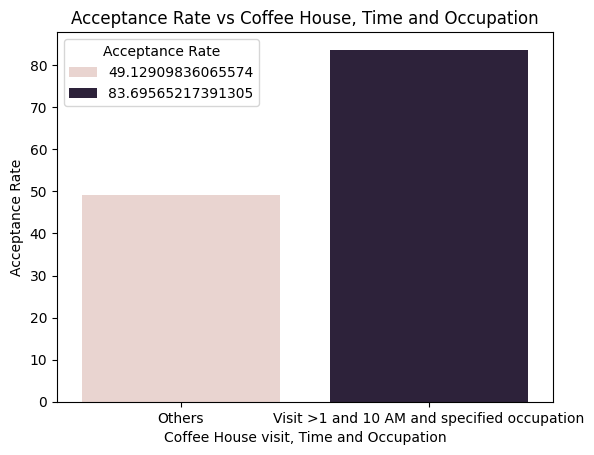

In [25]:
# Make a copy of data_coffee
data_coffee_copy = data_coffee.copy()
# Add a new column to data_coffee_copy 'CoffeeFrequencyAge'
data_coffee_copy['CoffeeFrequencyTime'] = data_coffee_copy.apply(lambda row : 'Visit >1 and 10 AM and specified occupation' if( ((row['CoffeeHouse'] == '4~8') | (row['CoffeeHouse'] == '1~3') | (row['CoffeeHouse'] == 'gt8'))  & (row['time'] == '10AM') &
                                                                  ((row['occupation'] =='Student') | (row['occupation'] =='Healthcare Practitioners & Technical') | (row['occupation'] =='Healthcare Support')))
                                                     else 'Others', axis=1)
# Group rows with new 'CoffeeFrequency' and find the mean of 'Y' which will give the average of 'Y' values with 1
data_coffee_acceptance_rate = (data_coffee_copy.groupby(['CoffeeFrequencyTime'])['Y'].mean()*100).reset_index()
sns.barplot(data_coffee_acceptance_rate , x= 'CoffeeFrequencyTime', y = 'Y', hue='Y')
plt.xlabel('Coffee House visit, Time and Occupation')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate vs Coffee House, Time and Occupation')
plt.legend(title="Acceptance Rate")

7. Compare the acceptance rate between those who went to a coffee house more than once and driving with friends vs Others

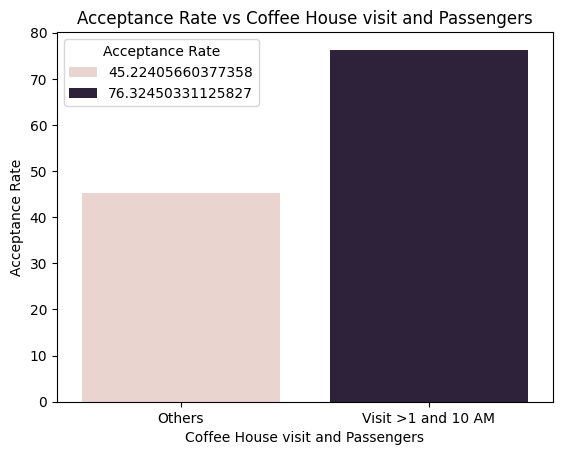

In [26]:
# Make a copy of data_coffee
data_coffee_copy = data_coffee.copy()
# Add a new column to data_coffee_copy 'CoffeeFrequencyAge'
data_coffee_copy['CoffeeFrequencyPassengers'] = data_coffee_copy.apply(lambda row : 'Visit >1 and 10 AM' if( ((row['CoffeeHouse'] == '4~8') | (row['CoffeeHouse'] == '1~3') | (row['CoffeeHouse'] == 'gt8'))  & (row['passanger'] == 'Friend(s)') )
                                                     else 'Others', axis=1)
# Group rows with new 'CoffeeFrequency' and find the mean of 'Y' which will give the average of 'Y' values with 1
data_coffee_acceptance_rate = (data_coffee_copy.groupby(['CoffeeFrequencyPassengers'])['Y'].mean()*100).reset_index()
sns.barplot(data_coffee_acceptance_rate , x= 'CoffeeFrequencyPassengers', y = 'Y', hue='Y')
plt.xlabel('Coffee House visit and Passengers')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate vs Coffee House visit and Passengers')
plt.legend(title="Acceptance Rate")

8. Does age has an impact on drivers accepting coffee coupon?

Text(0.5, 1.0, 'Acceptance Rate vs Age')

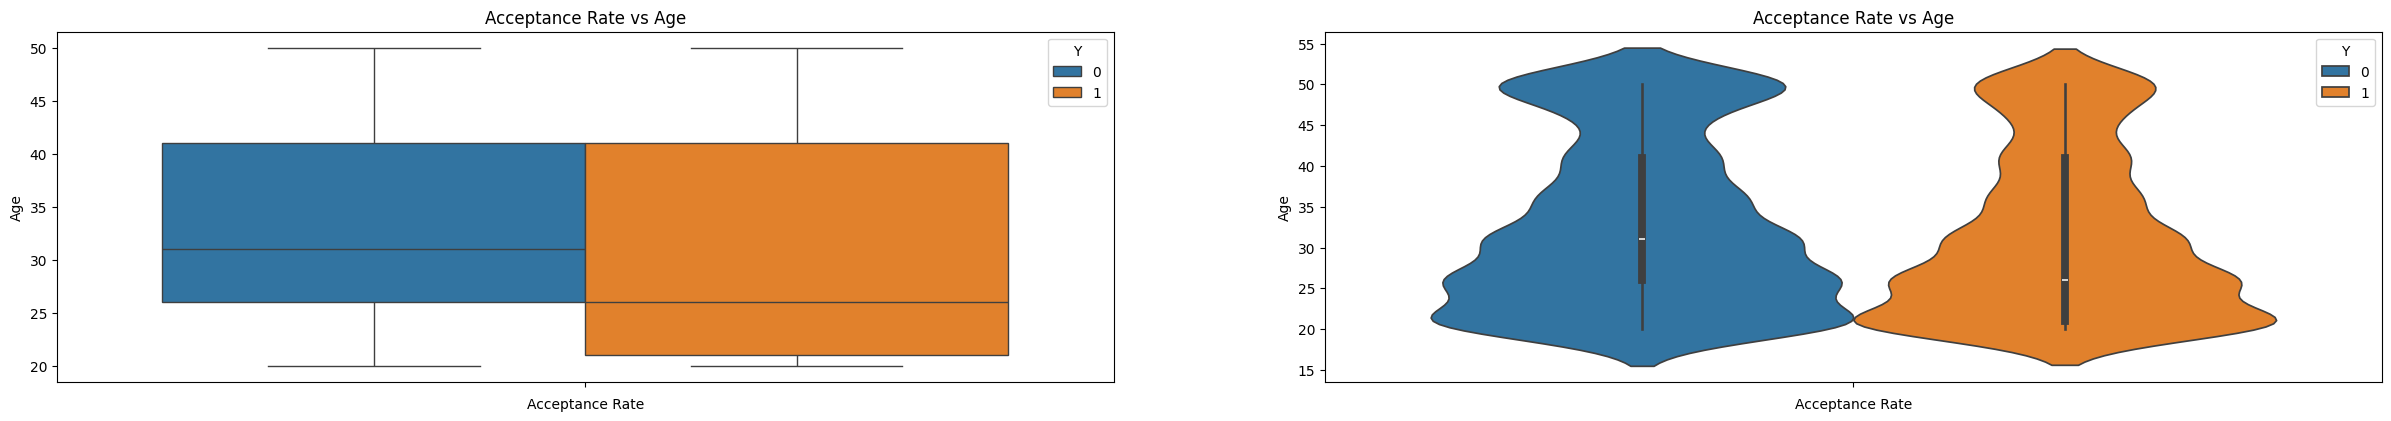

In [42]:
# Make a copy of data_coffee
data_coffee_age_copy = data_coffee.copy()
#Clean the data. Map string to int
data_coffee_age_copy['age'] = data_coffee_age_copy['age'].replace({'below21': '20', '50plus': '50'})  # Replace specific cases
data_coffee_age_copy['age'] = data_coffee_age_copy['age'].str.extract('(\d+)').astype(int)

plt.figure(figsize=(30,10))

plt.subplot(221)
sns.boxplot(data=data_coffee_age_copy, y='age' , hue='Y')
plt.xlabel('Acceptance Rate')
plt.ylabel('Age')
plt.title('Acceptance Rate vs Age')

plt.subplot(222)
sns.violinplot(data=data_coffee_age_copy, y='age' , hue='Y')
plt.xlabel('Acceptance Rate')
plt.ylabel('Age')
plt.title('Acceptance Rate vs Age')


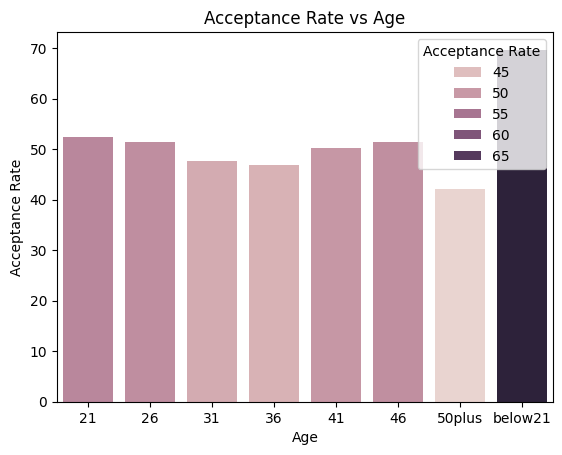

In [ ]:
# Make a copy of data_coffee
data_coffee_age_copy = data_coffee.copy()
data_coffee_age_acceptance_rate = (data_coffee_age_copy.groupby(['age'])['Y'].mean()*100).reset_index()
sns.barplot(data_coffee_age_acceptance_rate , x= 'age', y = 'Y', hue='Y')
plt.xlabel('Age')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate vs Age')
plt.legend(title="Acceptance Rate")

9.  Inference/Action Items/Next steps from the analysis

 🇰
**Below are the inferences from the analysis**

*   Drivers who have visited a coffee house multiple times and are driving at 10 AM exhibit a significantly high acceptance rate for coffee house coupons.
*   Drivers traveling with friends show a higher acceptance rate for coffee house coupons.
*   Drivers aged 31 and below have a higher acceptance rate for coffee house coupons.
*   Students and healthcare professionals who have visited a coffee house multiple times exhibit a higher acceptance rate for coffee house coupons.

*   Drivers who have visited a coffee house multiple times and are traveling with friends show a higher acceptance rate for coffee house coupons.
* 1-day expiration coupons have a higher acceptance rate for coffee house coupons.
* Gender does not influence the acceptance rate of coffee house coupons.









**Here are actionable items based on the data analysis inferences for increasing the acceptance rate of coffee house coupons:**

*   Launch targeted coupon campaigns around 10 AM to capitalize on the high acceptance rate during this time.
*   Offer exclusive or loyalty-based coupons for drivers who have visited coffee houses more than once.
*   Design referral or group-based incentives for drivers traveling with friends (e.g., "Buy 1 Get 1 Free" or "Group Discount" coupons).
*   Run targeted ad campaigns or coupon promotions aimed at drivers aged 31 and below. Leverage platforms where younger audiences are more active (like social media).
*   Create special promotions for students and healthcare professionals who are frequent coffee house visitors (e.g., "Student Discounts" or "Healthcare Heroes Specials").
*   Avoid customizing coupon offers based on gender, as gender has no impact on acceptance rates.





